# Notes of Data Preprocessing

By: Haiyang Yu, yhyoscar@gmail.com, 10/15/2017

## 1. Data types

What is "data"? Quantifiable information.

There are numerious types of data in this world: measured data by facilities or human beings (e.g. scale, time, mass, force, velocity, temperature, concentration of chemical components, population, density, etc.), nonnumeric data (text, abstractive ideas, symbols, music, taste, feeling, emotion, etc.).

Sklearn.datesets provides various types of data for practise:
http://scikit-learn.org/stable/datasets/index.html

Most types of data can be quantified as arraies (e.g. matrix, vectors, tensors), including gridded data, images, graphs, signals, tables, sequences, stacks, etc. Then, the linear algebra theories can be used to deal with them.

--- List of useful packages ---

pandas: http://pandas.pydata.org/pandas-docs/stable/

opencv: http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_setup/py_intro/py_intro.html

nltk: http://www.nltk.org/

audio and music: https://wiki.python.org/moin/PythonInMusic



In [4]:
# Tables
import numpy as np
import pandas as pd

tb = pd.read_csv('./board.csv')
for t in tb.name[tb.color=='Red']:
    print t

Kentucky Avenue
Indiana Avenue
Illinois Avenue


(451, 600, 3)


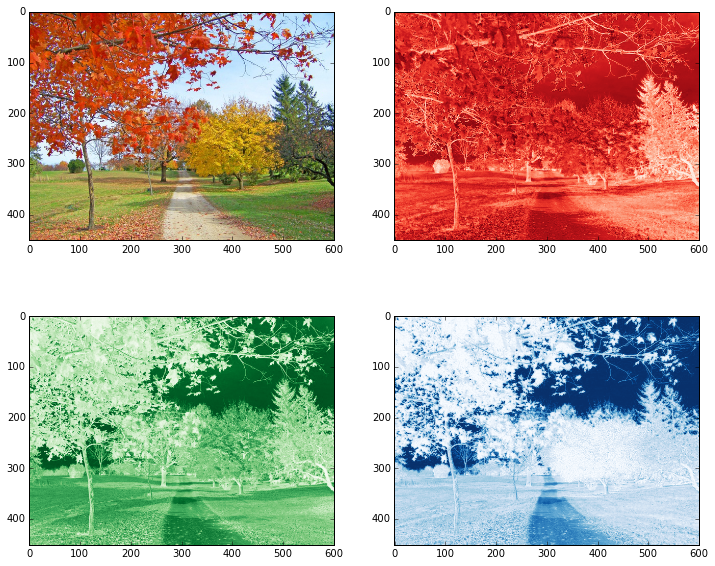

In [5]:
# Read images with matplotlib
# To use opencv with python on MAC, do the following steps:
# 1. brew install opencv
# 2. cd ~/anaconda/lib/python2.7/
# 3. ln -s /usr/local/Cellar/opencv/3.3.0_3/lib/python2.7/site-packages/cv2.so ./cv2.so

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic = mpimg.imread('autumn.jpg')
print pic.shape

plt.figure(1, figsize=(12,10))
plt.subplot(2,2,1)
plt.imshow(pic[:,:,:])
cmaps = ['Reds', 'Greens', 'Blues']
for i in range(3):
    plt.subplot(2,2,i+2)
    plt.imshow(pic[:,:,i],cmap=cmaps[i])


In [10]:
# Texts
import nltk
# When you use nltk the first time, try firstly: nltk.download()
sentence = """At eight o'clock on Thursday morning Arthur didn't feel very good."""
tokens = nltk.word_tokenize(sentence)

print tokens

['At', 'eight', "o'clock", 'on', 'Thursday', 'morning', 'Arthur', 'did', "n't", 'feel', 'very', 'good', '.']


## 2. Basic statistical analysis

### 2.1 Mean, variance, skewness, scaling

Mean: $ \bar{X} = \frac{1}{n} \Sigma x_i$

Variance: $ s^2 = \overline{(X-\bar{X})^2}$

$\ \ \ = \frac{1}{n} \Sigma(x_i-\bar{X})^2 $ (biased, maximum likehood estimation)

$\ \ \  = \frac{1}{n-1} \Sigma(x_i-\bar{X})^2 $ (unbiased)

Skewness: $ b = m_3/s^3$ , where $ m_3 = \overline{(X-\bar{X})^3}$

Scaling: $$ X' = \frac{X - \bar {X}}{s} $$

In [90]:
from sklearn import preprocessing

x = np.random.normal(2.0, 3.0, 100)
print np.mean(x)
print np.std(x), np.sqrt(np.mean((x-np.mean(x))**2))
print np.std(x, ddof=1), np.sqrt(np.sum((x-np.mean(x))**2)/(len(x)-1))

xscale = preprocessing.scale(x)
print 'scaled mean and std: ',np.mean(xscale), np.std(xscale)

# check the scaled series
print np.sum(np.abs((x-np.mean(x))/np.std(x) - xscale))
print np.sum(np.abs((x-np.mean(x))/np.std(x,ddof=1) - xscale))


1.74781848155
2.89023939379 2.89023939379
2.90479988591 2.90479988591
scaled mean and std:  5.44009282066e-17 1.0
0.0
0.372708423114


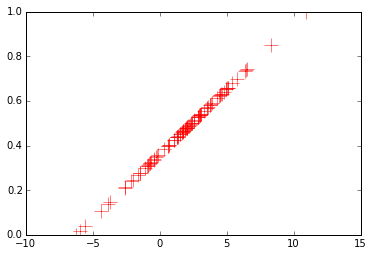

In [108]:
# rescale into a range
scaler = preprocessing.MinMaxScaler()
x2 = scaler.fit_transform(x.reshape(100,1))
plt.plot(x, x2, 'r+', markersize=14)

### 2.2 CDF, PDF, joint PDF, correlation, liear regression

Cumulative density function: $ F(x) = \int_{-\infty}^{x} dF(x) = \int_{-\infty}^{x} f(x) dx$

Joint PDF: $f(x,y)$

Multivariate normal distribution: random variables $x \in \mathbb{R}^n$ follow the multivariate normal distribution $\mathcal{N} (\mu, \Sigma)$, when the joint PDF is

$$ f(x) = \frac{1}{\sqrt{(2\pi)^n |\Sigma|} } e^{-\frac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu)} $$

Correlation: $$\rho (x,y) = \frac{s_{xy}}{s_x s_y}$$

linear regression: 

Given $x_i \in \mathbb{R}^n$, $y_i \in \mathbb{R}$, where i=1,2,...,m, find the estimation $\hat{y}_i = w^T x_i + b$, s.t. $ min \Sigma \mathcal{L} (y_i, \hat{y}_i) $


In [85]:
import scipy

def jpdfmultinorm(x, mean, cov):
    # x: [ndim, nsample]
    # mean: [ndim, 1]
    # cov: [ndim, ndim]
    return np.exp(-0.5*np.sum((x-mean)*np.dot(np.linalg.inv(cov), x-mean), axis=0 ))/ \
        np.sqrt((2*np.pi)**len(mean)*np.linalg.det(cov))

mean = [2, 1]
cov  = [[10, -3], [-3, 5]]
plt.figure(1, figsize=(6,6))
xx,yy = np.meshgrid(np.linspace(-2,6,51), np.linspace(-3,5,51))
p = jpdfmultinorm( np.append(xx.reshape(1, 51*51), yy.reshape(1, 51*51), axis=0), \
                  np.array(mean).reshape(2,1), np.array(cov).reshape(2,2) ).reshape(51,51)
plt.contourf(xx,yy,p, 21, cmap='hot')

x, y = np.random.multivariate_normal(mean, cov, 100). T
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
print 'cor=',r_value, ' P=', 1-p_value
plt.plot(x,y,'mo', x, x*slope+intercept, 'b-')



cor= -0.374790988598  P= 0.999877868408


SMI (198,)
SID (198,)
(198, 2)
mean:  [-0.00055475  0.00022657]
covariance matrix: 
[[ 0.00052829  0.00019758]
 [ 0.00019758  0.00147934]]
cor= 0.223710724322  P= 0.998466188245


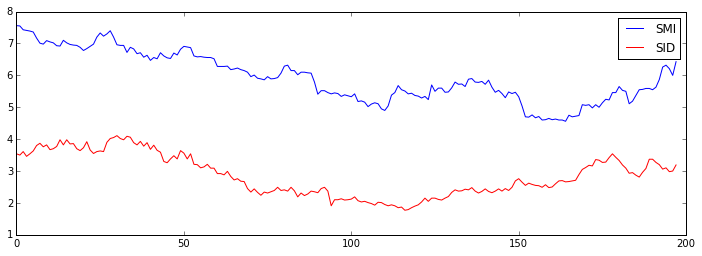

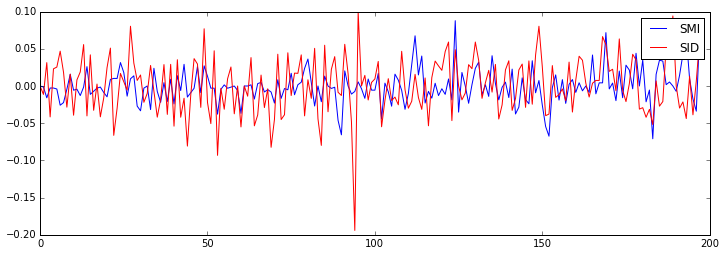

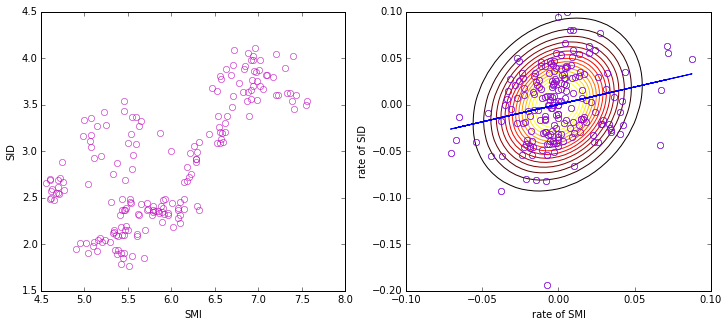

In [515]:
def freturn(x):
    return np.append(0, x[1:]/x[0:-1]-1)

names = ['SMI', 'SID']
data = {}
for name in names:
    tb    = pd.read_csv('./'+name+'.csv')
    time  = np.array([dateutil.parser.parse(t) for t in tb.Date[:]])
    year  = np.array([t.year for t in time]).astype(int)
    price = np.array(tb.Close[:])
    data[name]  = price[year>=2017]
    print name, data[name].shape

plt.figure(1, figsize=(12, 4))
plt.plot(data[names[0]],'b', data[names[1]], 'r')
plt.legend(names)

plt.figure(2, figsize=(12, 4))
plt.plot(freturn(data[names[0]]),'b', freturn(data[names[1]]), 'r')
plt.legend(names)

plt.figure(3, figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(data[names[0]], data[names[1]], 'o', color='none', markeredgecolor='m')
plt.xlabel(names[0])
plt.ylabel(names[1])

plt.subplot(1,2,2)
plt.plot(freturn(data[names[0]]), freturn(data[names[1]]), \
         'o', color='none', markeredgecolor='b')

n = len(data[names[0]])
x = np.append(freturn(data[names[0]]).reshape(n,1), \
              freturn(data[names[1]]).reshape(n,1), axis=1)
print x.shape
mean = np.mean(x, axis=0)
cov = np.dot(x.T, x) / n
print 'mean: ',mean
print 'covariance matrix: '
print cov

xx,yy = np.meshgrid(np.linspace(-0.1,0.1,51), np.linspace(-0.2,0.1,51))
p = jpdfmultinorm( np.append(xx.reshape(1, 51*51), yy.reshape(1, 51*51), axis=0), \
                  np.array(mean).reshape(2,1), np.array(cov).reshape(2,2) ).reshape(51,51)
plt.contour(xx,yy,p, 21, cmap='hot')

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x[:,0], x[:,1])
print 'cor=',r_value, ' P=', 1-p_value
plt.plot(x[:,0], x[:,1],'o', color='none', markeredgecolor='m')
plt.plot(x[:,0], x[:,0]*slope+intercept, 'b-')
plt.xlabel('rate of '+names[0])
plt.ylabel('rate of '+names[1])


## 3. Special situations and technics

### 3.1 Sparse data

Scaling usually breaks the sparseness of data, so this data should be dealed with carefully (e.g. using NaN to mask them).

### 3.2 Missing data

Use NaN or some paticular value to mask the missing data.

In [111]:
a = [1,2,3,np.nan,5.0]
print np.isnan(a)
print np.mean(a), np.nanmean(a)

[False False False  True False]
nan 2.75


### 3.3 Smoothing and filtering

#### 3.3.1 Moving average

a) Multiple points averge

Given a squence $x_i$ (i=1,2,...,n), the smoothed squence could be:

$$ x'_i = \Sigma_{j=i-K}^{i+K} w_j x_j $$

, where $\Sigma w_j = 1$

e.g. 3-point smoothing: $ x'_i = (x_{i-1} + 2x_i + x_{i+1})/4$

5-point 2D smoothing: $ x'_{i,j} = (x_{i, j-1} + x_{i, j+1} + 4x_{i,j} + x_{i-1,j} + x_{i+1,j})/8$

In [378]:
def fsmooth3p(x, n=1):
    y = x + 0
    for i in range(n):
        y[1:-1] = (y[0:-2] + 2*y[1:-1] + y[2:])/4.0
    return y

import dateutil
import datetime

tb    = pd.read_csv('./SMI.csv')
time  = np.array([dateutil.parser.parse(t) for t in tb.Date[:]])
year  = np.array([t.year for t in time]).astype(int)
price = np.array(tb.Close[:])
x  = price[year>=2016]
tx = time[year>=2016]
print price.shape, x.shape


(3419,) (449,)


([<matplotlib.axis.XTick at 0x1a8c3b1d0>,
 <a list of 12 Text xticklabel objects>)

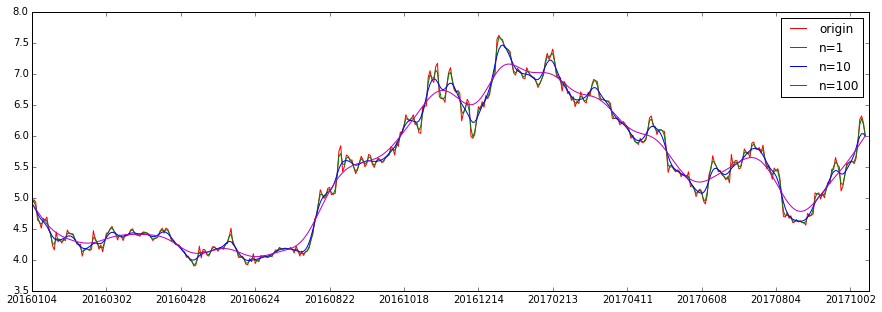

In [379]:
plt.figure(1, figsize=(15,5))
plt.plot(x,'r', fsmooth3p(x, n=1), 'g', fsmooth3p(x, n=10), 'b', \
         fsmooth3p(x, n=100), 'm')
plt.legend(['origin', 'n=1', 'n=10', 'n=100'])
plt.xticks(range(len(x))[::40], [t.year*10000+t.month*100+t.day for t in tx[::40]])


b) Exponential moving average (EMA)

$$ x'_i = \lambda x_i + (1-\lambda) x'_{i-1} $$

([<matplotlib.axis.XTick at 0x1a7d63b50>,
 <a list of 12 Text xticklabel objects>)

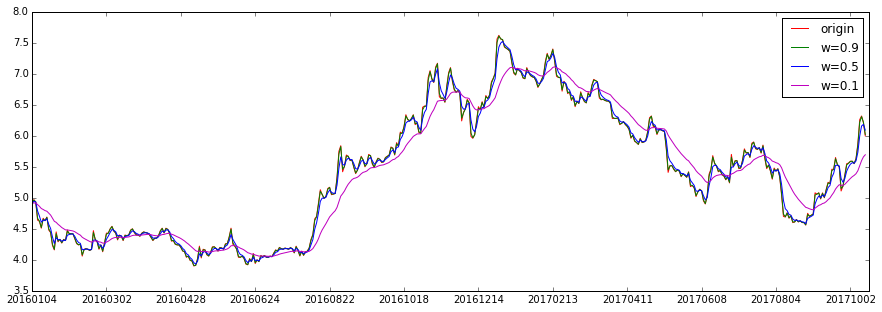

In [381]:
def fema(x, w=0.9):
    y = x+0
    for i in range(1,len(x)):
        y[i] = w*x[i] + (1-w)*y[i-1]
    return y

plt.figure(1, figsize=(15,5))
plt.plot(x,'r', fema(x, w=0.9), 'g', fema(x, w=0.5), 'b', fema(x, w=0.1), 'm')
plt.legend(['origin', 'w=0.9', 'w=0.5', 'w=0.1'])
plt.xticks(range(len(x))[::40], [t.year*10000+t.month*100+t.day for t in tx[::40]])


#### 3.3.2 Fltering by spectral transform

Fourier transform:

$$ F(k) = \int f(x) e^{-ikx} dx$$

Inverse Fourier transform:

$$ f(x) = Re[ \Sigma F(k) e^{ikx} ]$$

Advantages:
1. Systematic smoothing;
2. Keep the periodic features.

Problems:
1. Conservation issue;
2. The signal should be periodic;
3. Gibbs phenomenon.


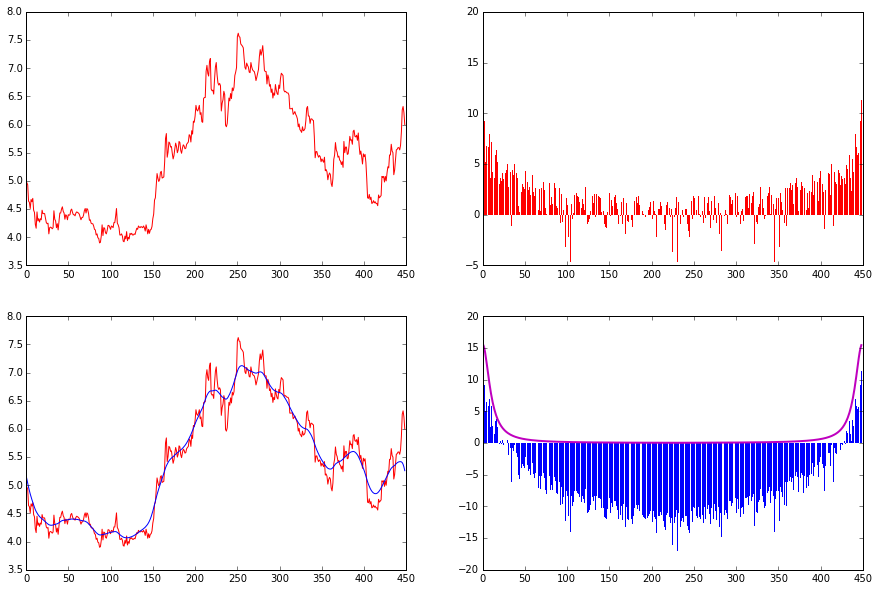

In [385]:
from scipy.fftpack import fft, ifft

n = len(x)
f = fft(x)
k = np.array(range(n//2+1) + range(-n//2+1,0))

plt.figure(1, figsize=(15,10))
plt.subplot(2,2,1); plt.plot(x,'r')
plt.subplot(2,2,2); 
plt.bar(range(n), np.log(f.real[:]**2+ f.imag[:]**2), color='r', edgecolor='none')
plt.subplot(2,2,4)
a = 100.0
plt.plot(np.log(f.real[0]**2+ f.imag[0]**2)*1.0/(1.0+k**2/a), 'm', lw=2)
f *= 1.0/(1.0+k**2/a)
plt.bar(range(n), np.log(f.real[:]**2+ f.imag[:]**2), color='b', edgecolor='none')

plt.subplot(2,2,3)
plt.plot(x,'r', ifft(f).real,'b')


### 3.4 Transformation and convolution

Transformation: given data $x_i$, (i=1,2,...,n), transfer the variable to certain distribution (e.g. normal distribution, log-normal distribution, uniform distribution, etc.), based on the estimation of statistical parameters (e.g. mean, variance).

Convolution: the convolution of two functions $f(t)$ and $g(t)$ is defined as:

$$ (f*g)(t) \equiv \int_{-\infty}^{\infty} f(\tau) g(t-\tau) d\tau = \int_{-\infty}^{\infty} f(t-\tau) g(\tau) d\tau $$

https://en.wikipedia.org/wiki/Convolution


 0.000721867165507 0.0234788229472


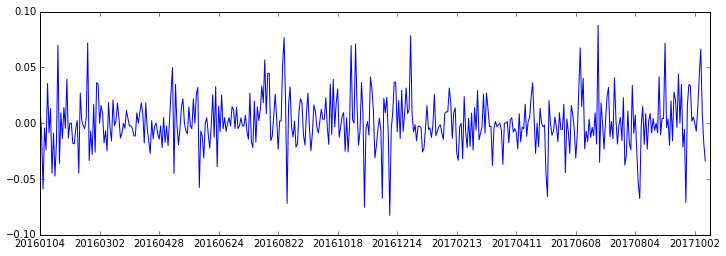

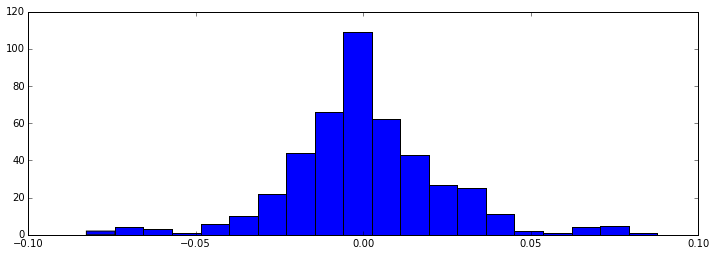

In [408]:
from scipy.stats import norm

plt.figure(1, figsize=(12, 4))
plt.plot((x[1:]/x[:-1]-1), 'b')
plt.xticks(range(len(x))[::40], [t.year*10000+t.month*100+t.day for t in tx[::40]])

plt.figure(2, figsize=(12, 4))
aa,bb,cc = plt.hist(x[1:]/x[:-1]-1, bins=20)

print np.mean(x[1:]/x[:-1]-1), np.std(x[1:]/x[:-1]-1, ddof=1)

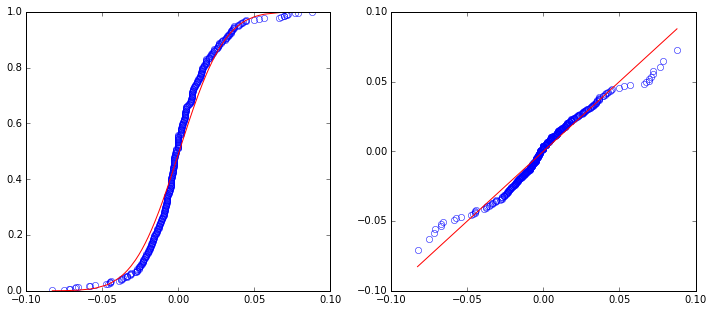

In [416]:
# heavy tail 

r = x[1:]/x[:-1]-1; n-=1

plt.figure(1, figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(np.sort(r), \
        (np.arange(0,n)+0.5)/n, 'o', color='none', markeredgecolor='b')
plt.plot(np.sort(r), \
        norm.cdf(np.sort(r), \
        np.mean(r), np.std(r, ddof=1) ), 'r')

plt.subplot(1,2,2)
plt.plot(np.sort(r), \
        norm.ppf((np.arange(0,n)+0.5)/n, \
        np.mean(r), np.std(r, ddof=1) ), \
        'o', color='none', markeredgecolor='b')
plt.plot([min(r), max(r)], [min(r), max(r)], 'r')


([<matplotlib.axis.XTick at 0x1c1008810>,
 <a list of 12 Text xticklabel objects>)

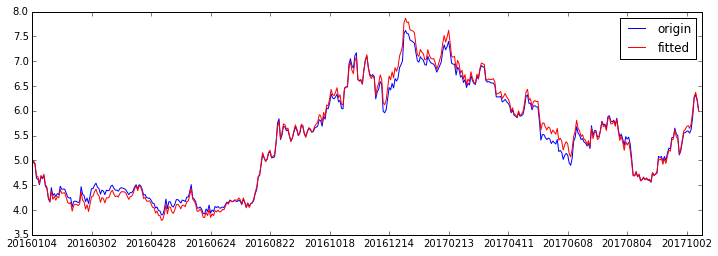

In [449]:
rank = np.zeros(len(r))
rank[np.argsort(r)] = np.arange(len(r))
r2 = norm.ppf( (rank+0.5)/n, np.mean(r), np.std(r, ddof=1) )

plt.figure(1, figsize=(12, 4))
plt.plot(x,'b', np.append(x[0], x[0]*np.cumprod(r2+1)), 'r')
plt.legend(['origin', 'fitted'])
plt.xticks(range(len(x))[::40], [t.year*10000+t.month*100+t.day for t in tx[::40]])


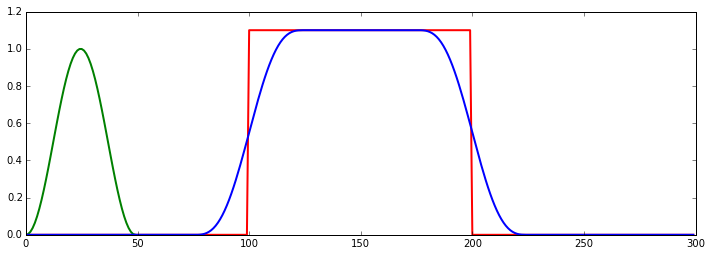

In [459]:
from scipy import signal
sig = np.repeat([0., 1.1, 0.], 100)
win = signal.hann(50)
filtered = signal.convolve(sig, win, mode='same') / sum(win)

plt.figure(1, figsize=(12,4))
plt.plot(sig, 'r', win, 'g', filtered, 'b', lw=2)

## 4. Dimension reduction

###  Primary component analysis (PCA) and singlar value decomposition (SVD)

a) Description of the question

Given a (centered) dataset matrix $X=\{x_{ij} \}$ (i=1,2,...,n; j=1,2,...,p), where p is the dimension and n is the number of samples, how to find an orthogonal linear transformation $w = \{ w_k\}$ (k=1,2,...,p; $\| w \| = 1$), so that $y = wX^T = \{ \sum_{k=1}^{p} w_{k}x_{ik} \}$ (j=1,2,...,n) has the maximum variance $\sigma^2 (y)$. Mathematically, it can be described as:

Find $w = argmax[\frac{1}{n} (wX^T)(wX^T)^T ] = argmax(\frac{1}{n} wX^TXw^T) = argmax [\frac{1}{n}\sum_{i=1}^{n} (\sum_{k=1}^{p} w_{k}x_{ik})^2 ] $, s.t. $\| w \| = 1$.

This question turns out to be reduced to solve the eigevalue-eigenvector of the covariance matrix of the dataset $\Sigma = \frac{1}{n} X^TX$, which is a symmetric positive definite matrix that can be decomposed into two matrix with eigenvectors and one diagonal matrix with eigenvalues $\Sigma = W \Lambda W^T$, where $W^T = W^{-1}$ (orthogonal unit matrix). The eigenvector corresponded to the largest eigenvalue is named the first principal comoponent (PC1).

https://en.wikipedia.org/wiki/Principal_component_analysis

SMI (240,)
SID (240,)
CLF (240,)


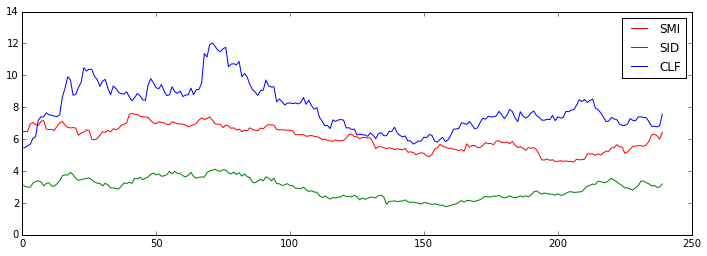

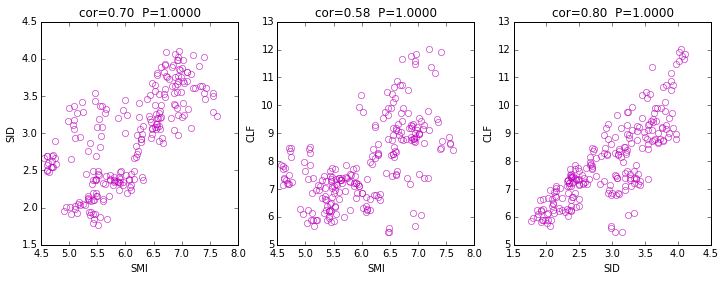

In [583]:
names = ['SMI', 'SID', 'CLF']
cstrs = ['r', 'g', 'b']
x = []
for name in names:
    tb    = pd.read_csv('./'+name+'.csv')
    time  = np.array([dateutil.parser.parse(t) for t in tb.Date[:]])
    year  = np.array([t.year for t in time]).astype(int)
    mon   = np.array([t.month for t in time]).astype(int)
    price = np.array(tb.Close[:])
    x.append(price[(year*100+mon)>=201611])  # After the election of president Trump
    tx = time[(year*100+mon)>=201611]
    print name, x[-1].shape

plt.figure(1, figsize=(12, 4))
for i in range(len(names)):
    plt.plot(x[i],cstrs[i])
plt.legend(names)

plt.figure(2, figsize=(12, 4))
ipic = [[0,1], [0,2], [1,2]]
for i in range(len(ipic)):
    plt.subplot(1,len(ipic),i+1)
    plt.plot(x[ipic[i][0]], x[ipic[i][1]], 'o', color='none', markeredgecolor='m')
    plt.xlabel(names[ipic[i][0]])
    plt.ylabel(names[ipic[i][1]])
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x[ipic[i][0]], \
                                                                         x[ipic[i][1]])
    plt.title('cor='+format(r_value,'.2f')+'  P='+format(1-p_value,'.4f') )


(3, 240)


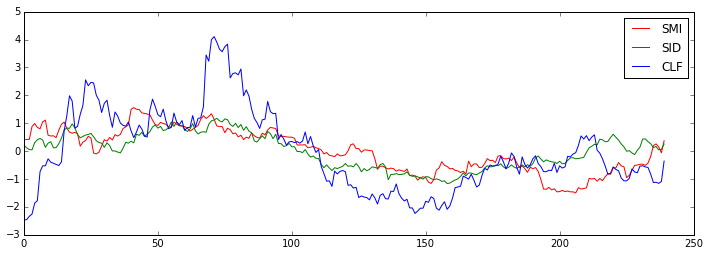

In [584]:
# centering data
x = np.array(x) - np.mean(np.array(x), axis=1).reshape(len(names), 1)
print x.shape

plt.figure(1, figsize=(12, 4))
for i in range(len(names)):
    plt.plot(x[i],cstrs[i])
plt.legend(names)

plt.figure(2, figsize=(12, 4))
ipic = [[0,1], [0,2], [1,2]]
for i in range(len(ipic)):
    plt.subplot(1,len(ipic),i+1)
    plt.plot(x[ipic[i][0]], x[ipic[i][1]], 'o', color='none', markeredgecolor='m')
    plt.xlabel(names[ipic[i][0]])
    plt.ylabel(names[ipic[i][1]])
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x[ipic[i][0]], \
                                                                         x[ipic[i][1]])
    plt.title('cor='+format(r_value,'.2f')+'  P='+format(1-p_value,'.4f') )


In [585]:
# covariance matrix
cov = np.dot(x, x.T)/x.shape[1]
print cov

[[ 0.60072954  0.33814895  0.64828943]
 [ 0.33814895  0.38822666  0.71655347]
 [ 0.64828943  0.71655347  2.06086194]]


In [586]:
# numpy.linalg.svd ~ scipy.linalg.svd
u, s, v = np.linalg.svd(cov)

print 'U: '
print u
print 'S: '
print np.diag(s)
print 'V: '
print v
print 'check USV: '
print np.dot(u, np.dot(np.diag(s), v))
print 'check UV: '
print np.dot(u, v)
print 'check total variance: '
print np.sum(np.diag(cov)), np.sum(s)
print 'check the variance of each component: '
print np.dot(np.dot(u.T, x), np.dot(u.T, x).T)/x.shape[1]
print 'check the length of each eigenvector'
print np.sum(u*u, axis=0)

U: 
[[-0.34295267  0.88374785  0.31839158]
 [-0.33781824  0.2002359  -0.91966539]
 [-0.87650574 -0.42296018  0.2298747 ]]
S: 
[[ 2.59069009  0.          0.        ]
 [ 0.          0.36707573  0.        ]
 [ 0.          0.          0.09205232]]
V: 
[[-0.34295267 -0.33781824 -0.87650574]
 [ 0.88374785  0.2002359  -0.42296018]
 [ 0.31839158 -0.91966539  0.2298747 ]]
check USV: 
[[ 0.60072954  0.33814895  0.64828943]
 [ 0.33814895  0.38822666  0.71655347]
 [ 0.64828943  0.71655347  2.06086194]]
check UV: 
[[  1.00000000e+00   6.10622664e-16   2.77555756e-16]
 [ -2.77555756e-16   1.00000000e+00   3.88578059e-16]
 [  1.11022302e-16  -5.55111512e-17   1.00000000e+00]]
check total variance: 
3.04981814236 3.04981814236
check the variance of each component: 
[[  2.59069009e+00   6.93889390e-17  -1.76710498e-16]
 [  6.93889390e-17   3.67075730e-01   7.72530188e-17]
 [ -1.76710498e-16   7.72530188e-17   9.20523185e-02]]
check the length of each eigenvector
[ 1.  1.  1.]


In [587]:
plt.figure(1, figsize=(12, 4))
for i in range(len(names)):
    plt.plot(x[i],cstrs[i])
plt.plot(-np.dot(u.T, x)[0], 'm', lw=2 )
plt.legend(names+['PC1: s='+format(s[0]/np.sum(s)*100,'.2f')+'%'])

In [588]:
# standardization
x /= np.std(x, axis=1).reshape(x.shape[0],1)

plt.figure(1, figsize=(12, 4))
for i in range(len(names)):
    plt.plot(x[i],cstrs[i])
plt.legend(names)

plt.figure(2, figsize=(12, 4))
ipic = [[0,1], [0,2], [1,2]]
for i in range(len(ipic)):
    plt.subplot(1,len(ipic),i+1)
    plt.plot(x[ipic[i][0]], x[ipic[i][1]], 'o', color='none', markeredgecolor='m')
    plt.xlabel(names[ipic[i][0]])
    plt.ylabel(names[ipic[i][1]])
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x[ipic[i][0]], \
                                                                         x[ipic[i][1]])
    plt.title('cor='+format(r_value,'.2f')+'  P='+format(1-p_value,'.4f') )


In [589]:
cov = np.dot(x, x.T)/x.shape[1]
print 'covariance matrix: '
print cov
u, s, v = np.linalg.svd(cov)
print 'U: '
print u
print 'S: '
print np.diag(s)
print 'V: '
print v
print 'check USV: '
print np.dot(u, np.dot(np.diag(s), v))
print 'check UV: '
print np.dot(u, v)
print 'check total variance: '
print np.sum(np.diag(cov)), np.sum(s)
print 'check the variance of each component: '
print np.dot(np.dot(u.T, x), np.dot(u.T, x).T)/x.shape[1]
print 'check the length of each eigenvector'
print np.sum(u*u, axis=0)

covariance matrix: 
[[ 1.          0.70020606  0.5826463 ]
 [ 0.70020606  1.          0.8010903 ]
 [ 0.5826463   0.8010903   1.        ]]
U: 
[[-0.54641569  0.79880284  0.25168218]
 [-0.60666887 -0.17033536 -0.77649131]
 [-0.57739309 -0.57697478  0.57768272]]
S: 
[[ 2.39309536  0.          0.        ]
 [ 0.          0.4298442   0.        ]
 [ 0.          0.          0.17706044]]
V: 
[[-0.54641569 -0.60666887 -0.57739309]
 [ 0.79880284 -0.17033536 -0.57697478]
 [ 0.25168218 -0.77649131  0.57768272]]
check USV: 
[[ 1.          0.70020606  0.5826463 ]
 [ 0.70020606  1.          0.8010903 ]
 [ 0.5826463   0.8010903   1.        ]]
check UV: 
[[  1.00000000e+00   1.11022302e-16   3.88578059e-16]
 [  3.88578059e-16   1.00000000e+00  -2.22044605e-16]
 [ -4.16333634e-16   1.66533454e-16   1.00000000e+00]]
check total variance: 
3.0 3.0
check the variance of each component: 
[[  2.39309536e+00  -4.13326780e-16   6.47630098e-17]
 [ -4.13326780e-16   4.29844198e-01   0.00000000e+00]
 [  6.47630098

([<matplotlib.axis.XTick at 0x1cf429050>,
 <a list of 6 Text xticklabel objects>)

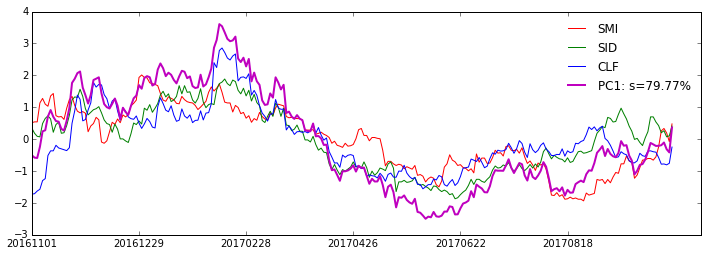

In [590]:
plt.figure(1, figsize=(12, 4))
for i in range(len(names)):
    plt.plot(x[i],cstrs[i])
plt.plot(-np.dot(u.T, x)[0], 'm', lw=2 )
plt.legend(names+['PC1: s='+format(s[0]/np.sum(s)*100,'.2f')+'%'], frameon=False)
plt.xticks(range(len(x[0]))[::40], [t.year*10000+t.month*100+t.day for t in tx[::40]])


## 5. Basic time series analysis

a) Spectral analysis: Frouier transform and wavelet;

b) Convolution.

Frourier transform and convolution: see section 3.

Wavelet: https://en.wikipedia.org/wiki/Wavelet




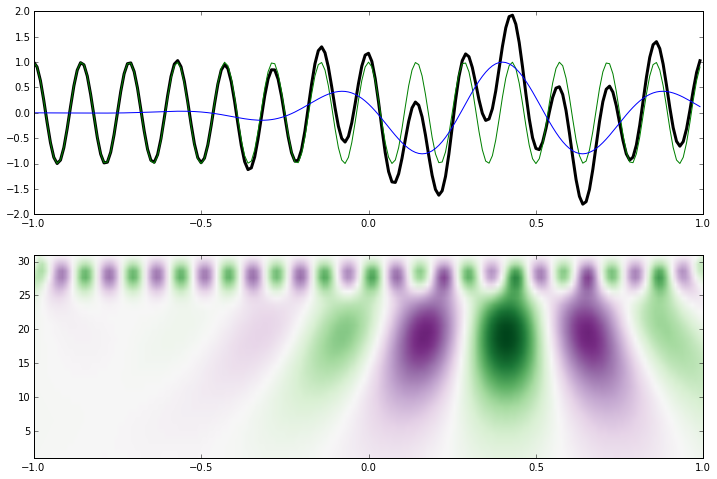

In [76]:
from scipy import signal

t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)

plt.figure(1, figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(t, sig, 'k', lw=3)
plt.plot(t,np.cos(2 * np.pi * 7 * t), 'g', \
        t, signal.gausspulse(t - 0.4, fc=2), 'b')

plt.subplot(2,1,2)
cwtmatr = signal.cwt(sig, signal.ricker, np.arange(1,31))
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto', \
    vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())


## 6. Basic image processing

matplotlib: https://matplotlib.org/users/image_tutorial.html

opencv: http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_setup/py_intro/py_intro.html

skimage: http://scikit-image.org/docs/stable/user_guide.html

### 6.1 Binarization, connected domain

In [65]:
import skimage
pic = skimage.io.imread('./autumn.jpg')
plt.imshow(pic)


In [66]:
plt.imshow(np.mean(pic,axis=2), cmap='gray')

In [67]:
picwb = np.mean(pic, axis=2)
hist, bins = np.histogram(picwb, bins=np.arange(0, 256))
plt.plot((bins[0:-1]+bins[1:])/2.0, hist)

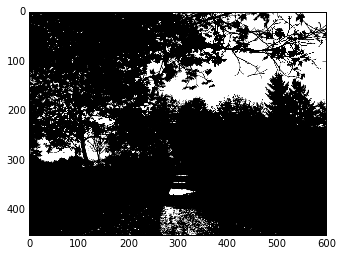

In [70]:
cc = 180
picwb[picwb < cc] = 0
picwb[picwb >= cc] = 255
plt.imshow(picwb, cmap='gray')

In [77]:
from skimage import measure
piclabel = measure.label(picwb)

plt.imshow(piclabel, cmap='spectral')
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x13aa16368>

### 6.2 Color space

A simple way of image compression is clustering the pixels in the color space.

http://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html

In [97]:
from sklearn.cluster import KMeans
pic  = skimage.io.imread('./autumn.jpg')
pic  = np.array(pic, dtype=np.float64) / 255
nx,ny,ncolor = pic.shape
picv = pic.reshape(nx*ny, ncolor)
kmeans = KMeans(n_clusters=3, random_state=0).fit(picv)


In [115]:
from matplotlib.colors import ListedColormap
cm = ListedColormap(kmeans.cluster_centers_)

plt.imshow(kmeans.labels_.reshape(nx,ny), interpolation='None', \
           cmap=cm )
plt.colorbar()


<matplotlib.colorbar.Colorbar instance at 0x156509908>

In [117]:
kmeans = KMeans(n_clusters=12, random_state=0).fit(picv)
cm = ListedColormap(kmeans.cluster_centers_)
plt.imshow(kmeans.labels_.reshape(nx,ny), cmap=cm)
plt.colorbar()


<matplotlib.colorbar.Colorbar instance at 0x13db939e0>

<matplotlib.colorbar.Colorbar instance at 0x13e776ea8>

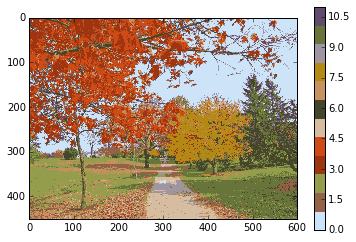

In [122]:
#   A faster way: first choose some samples and do clustering, 
# and then do prediction for the left pixels

index  = np.array(np.random.uniform(size=1000)*nx*ny, dtype=np.int)
kmeans = KMeans(n_clusters=12, random_state=0).fit(picv[index,:])
labels = kmeans.predict(picv)
cm = ListedColormap(kmeans.cluster_centers_)
plt.imshow(labels.reshape(nx,ny), cmap=cm, interpolation='None')
plt.colorbar()


### 6.3 Edge detection

Edge detection has been used broadly in the field of image processing.

http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html

http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html

https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=canny

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html


(300, 300, 3)


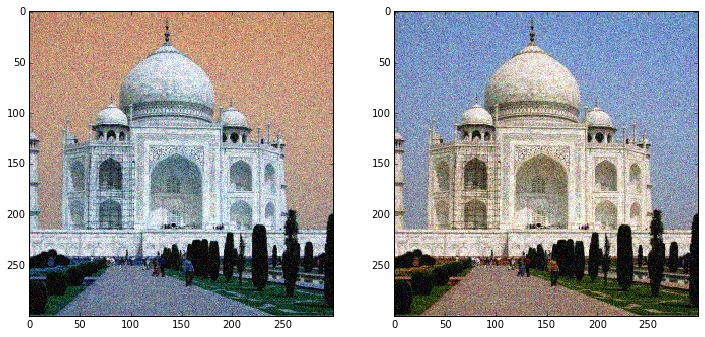

In [146]:
import cv2
img = cv2.imread('taj_noise.jpg',1)
print img.shape

# matplotlib: RGB
# opencv: BGR
plt.figure(1, figsize=(12, 6))
plt.subplot(121); plt.imshow(img, interpolation='None' )
plt.subplot(122); plt.imshow(img[:,:,::-1], interpolation='None' )


(300, 300)


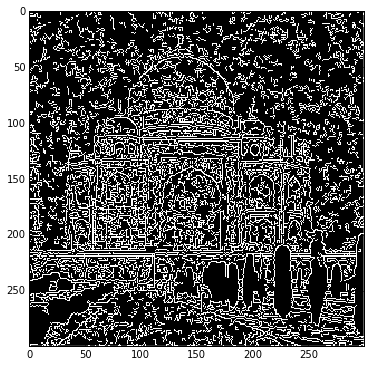

In [156]:
# convert RGB to gray scale
imgwb = cv2.cvtColor( img, cv2.COLOR_RGB2GRAY )

edges = cv2.Canny(imgwb, 100, 200)
print edges.shape
plt.figure(1, figsize=(6,6))
plt.imshow(edges, interpolation='None', cmap='gray')


To correctly detect the edges, we need to smooth out the noise first. There are many ways to achieve this goal:

2D convolution:

http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html

Filtering:

http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html

denoising:

https://docs.opencv.org/trunk/d5/d69/tutorial_py_non_local_means.html


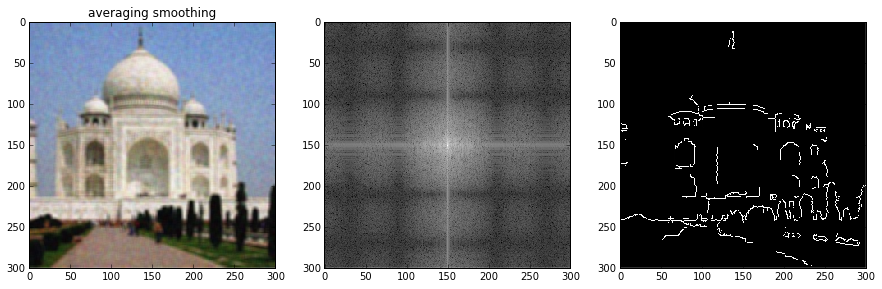

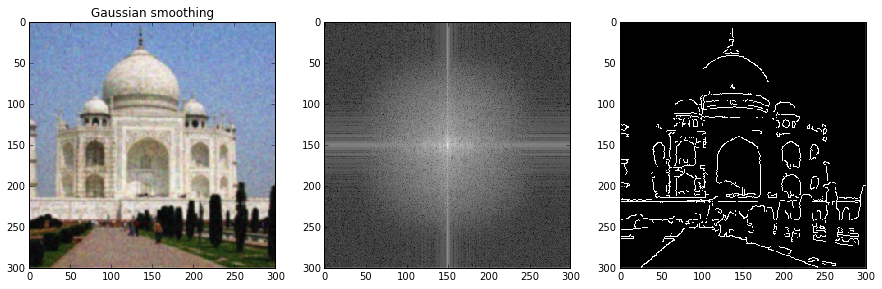

In [173]:
# image smoothing/filtering/denoising

tstrs = ['origin','averaging smoothing', 'Gaussian smoothing', 'denoising']
for k in range(4):
    # original image
    if k == 0:  pic = img + 0
    # avergaging smoothing (convolution with averged kernel)
    if k == 1:  pic = cv2.blur(img,(5, 5))
    # Gaussian smoothing (convolution with Gaussian kernel)
    if k == 2:  pic = cv2.GaussianBlur(img,(5, 5), 0)
    # denoising
    if k == 3:  pic = cv2.fastNlMeansDenoisingColored(img, None,10,10,7,21)

    picwb = cv2.cvtColor(pic, cv2.COLOR_RGB2GRAY)
    plt.figure(k+1, figsize=(15,5))
    plt.subplot(1,3,1)
    plt.imshow(pic[:,:,::-1], interpolation='None')
    plt.title(tstrs[k])
    plt.subplot(1,3,2)
    picfft = np.log(np.abs(np.fft.fftshift(np.fft.fft2(picwb))) + 1)
    plt.imshow(picfft, interpolation='None', cmap='gray')
    plt.subplot(1,3,3)
    edges = cv2.Canny(picwb, 100, 200)
    plt.imshow(edges, interpolation='None', cmap='gray')


### 6.4 Kaggle project as an example



In [1]:
import os
import numpy as np

class PersonScan:
    
    def __init__(self, filename):
        self.fn = filename

    #----------------------------------------------------------------------------------
    # read_header(infile):  takes an aps file and creates a dict of the data
    #
    # infile:               an aps file
    #
    # returns:              all of the fields in the header
    #----------------------------------------------------------------------------------
    def read_header(self):
        infile = self.fn
        # declare dictionary
        h = dict()

        with open(infile, 'r+b') as fid:

            h['filename'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 20))
            h['parent_filename'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 20))
            h['comments1'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 80))
            h['comments2'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 80))
            h['energy_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
            h['config_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
            h['file_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
            h['trans_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
            h['scan_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
            h['data_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
            h['date_modified'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 16))
            h['frequency'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['mat_velocity'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['num_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
            h['num_polarization_channels'] = np.fromfile(fid, dtype = np.int16, count = 1)
            h['spare00'] = np.fromfile(fid, dtype = np.int16, count = 1)
            h['adc_min_voltage'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['adc_max_voltage'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['band_width'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['spare01'] = np.fromfile(fid, dtype = np.int16, count = 5)
            h['polarization_type'] = np.fromfile(fid, dtype = np.int16, count = 4)
            h['record_header_size'] = np.fromfile(fid, dtype = np.int16, count = 1)
            h['word_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
            h['word_precision'] = np.fromfile(fid, dtype = np.int16, count = 1)
            h['min_data_value'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['max_data_value'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['avg_data_value'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['data_scale_factor'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['data_units'] = np.fromfile(fid, dtype = np.int16, count = 1)
            h['surf_removal'] = np.fromfile(fid, dtype = np.uint16, count = 1)
            h['edge_weighting'] = np.fromfile(fid, dtype = np.uint16, count = 1)
            h['x_units'] = np.fromfile(fid, dtype = np.uint16, count = 1)
            h['y_units'] = np.fromfile(fid, dtype = np.uint16, count = 1)
            h['z_units'] = np.fromfile(fid, dtype = np.uint16, count = 1)
            h['t_units'] = np.fromfile(fid, dtype = np.uint16, count = 1)
            h['spare02'] = np.fromfile(fid, dtype = np.int16, count = 1)
            h['x_return_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['y_return_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['z_return_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['scan_orientation'] = np.fromfile(fid, dtype = np.int16, count = 1)
            h['scan_direction'] = np.fromfile(fid, dtype = np.int16, count = 1)
            h['data_storage_order'] = np.fromfile(fid, dtype = np.int16, count = 1)
            h['scanner_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
            h['x_inc'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['y_inc'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['z_inc'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['t_inc'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['num_x_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
            h['num_y_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
            h['num_z_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
            h['num_t_pts'] = np.fromfile(fid, dtype = np.int32, count = 1)
            h['x_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['y_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['z_speed'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['x_acc'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['y_acc'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['z_acc'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['x_motor_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['y_motor_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['z_motor_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['x_encoder_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['y_encoder_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['z_encoder_res'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['date_processed'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 8))
            h['time_processed'] = b''.join(np.fromfile(fid, dtype = 'S1', count = 8))
            h['depth_recon'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['x_max_travel'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['y_max_travel'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['elevation_offset_angle'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['roll_offset_angle'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['z_max_travel'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['azimuth_offset_angle'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['adc_type'] = np.fromfile(fid, dtype = np.int16, count = 1)
            h['spare06'] = np.fromfile(fid, dtype = np.int16, count = 1)
            h['scanner_radius'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['x_offset'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['y_offset'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['z_offset'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['t_delay'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['range_gate_start'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['range_gate_end'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['ahis_software_version'] = np.fromfile(fid, dtype = np.float32, count = 1)
            h['spare_end'] = np.fromfile(fid, dtype = np.float32, count = 10)

            self.h = h
        return

    #----------------------------------------------------------------------------------
    # read_data(infile):  reads and rescales any of the four image types
    #
    # infile:             an .aps, .aps3d, .a3d, or ahi file
    #
    # returns:            the stack of images
    #
    # note:               word_type == 7 is an np.float32, word_type == 4 is np.uint16      
    #----------------------------------------------------------------------------------
    def read_data(self):
        infile = self.fn
        # read in header and get dimensions
        self.read_header()
        h = self.h

        nx = int(h['num_x_pts'])
        ny = int(h['num_y_pts'])
        nt = int(h['num_t_pts'])
        
        self.nx = nx
        self.ny = ny
        self.nt = nt

        extension = os.path.splitext(infile)[1]

        with open(infile, 'rb') as fid:

            # skip the header
            fid.seek(512) 

            # handle .aps and .a3aps files
            if extension == '.aps' or extension == '.a3daps':

                if(h['word_type']==7):
                    data = np.fromfile(fid, dtype = np.float32, count = nx * ny * nt)

                elif(h['word_type']==4): 
                    data = np.fromfile(fid, dtype = np.uint16, count = nx * ny * nt)

                # scale and reshape the data
                data = data * h['data_scale_factor'] 
                data = data.reshape(nx, ny, nt, order='F').copy()

            # handle .a3d files
            elif extension == '.a3d':

                if(h['word_type']==7):
                    data = np.fromfile(fid, dtype = np.float32, count = nx * ny * nt)

                elif(h['word_type']==4):
                    data = np.fromfile(fid, dtype = np.uint16, count = nx * ny * nt)

                # scale and reshape the data
                data = data * h['data_scale_factor']
                data = data.reshape(nx, nt, ny, order='F').copy() 

            # handle .ahi files
            elif extension == '.ahi':
                data = np.fromfile(fid, dtype = np.float32, count = 2* nx * ny * nt)
                data = data.reshape(2, ny, nx, nt, order='F').copy()
                real = data[0,:,:,:].copy()
                imag = data[1,:,:,:].copy()

            if extension != '.ahi':
                self.data = data
            else:
                self.real, self.imag = real, imag
        return

512 660 16
(512, 660, 16)


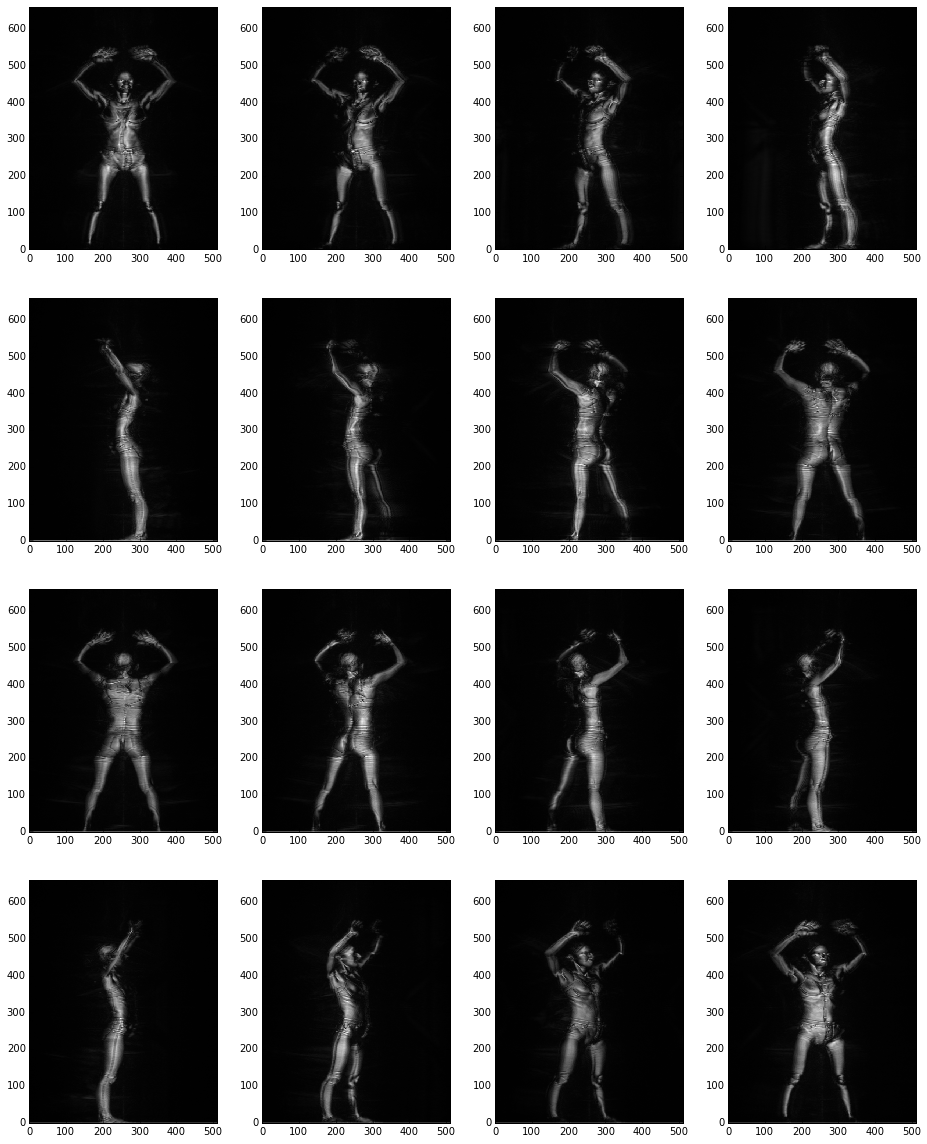

In [6]:
# low resolution images
ps = PersonScan('/Users/Oscar/yhy/Work/kaggle/psac/data/a8a613874b31d9f7d490c3ca28b7344e.aps')
ps.read_data()

print ps.nx, ps.ny, ps.nt
print ps.data.shape

plt.figure(1, figsize=(16, 20))
for i in range(4):
    for j in range(4):
        plt.subplot(4,4,i*4+j+1)
        plt.imshow(ps.data[:,:,(i*4+j)].T, interpolation='None', cmap='gray')
        plt.gca().invert_yaxis()
        

512 660 64
(512, 660, 64)


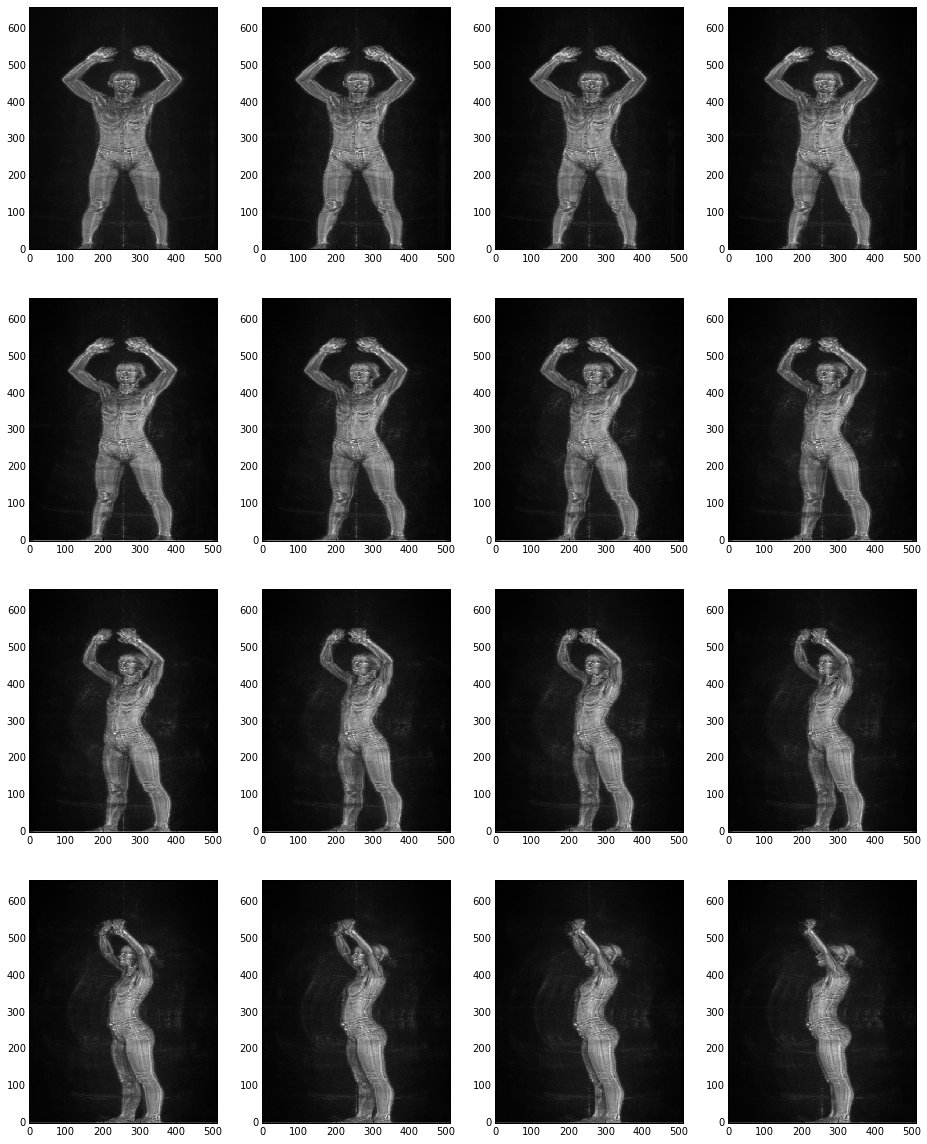

In [196]:
# high resolution images
ps = PersonScan('/Users/Oscar/yhy/Work/kaggle/psac/data/a8a613874b31d9f7d490c3ca28b7344e.a3daps')
ps.read_data()

print ps.nx, ps.ny, ps.nt
print ps.data.shape

plt.figure(1, figsize=(16, 20))
for i in range(4):
    for j in range(4):
        plt.subplot(4,4,i*4+j+1)
        plt.imshow(ps.data[:,:,(i*4+j)].T, interpolation='None', cmap='gray')
        plt.gca().invert_yaxis()
        


512 660 16
(512, 660, 16)


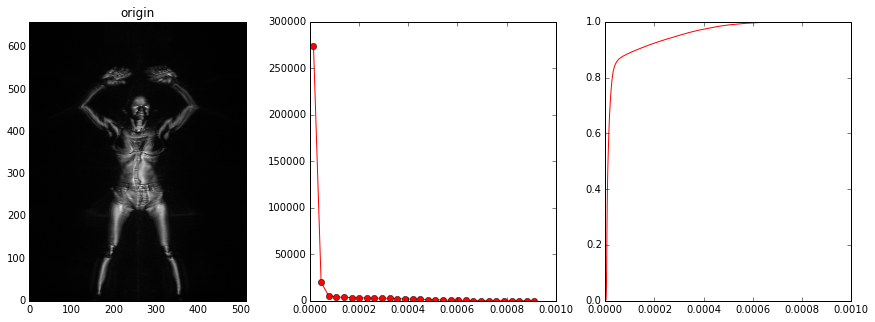

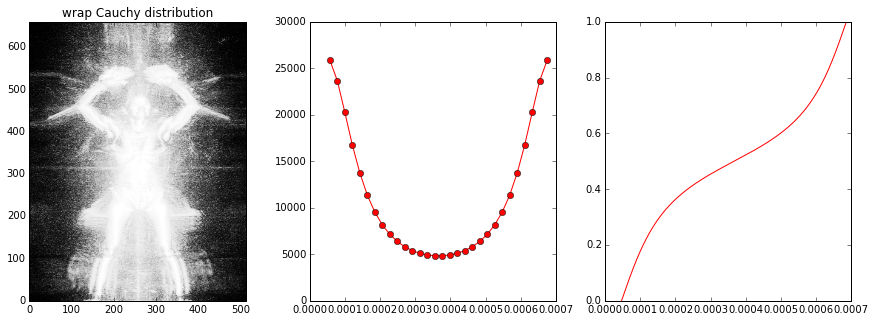

In [57]:
# low resolution images
ps = PersonScan('/Users/Oscar/yhy/Work/kaggle/psac/data/a8a613874b31d9f7d490c3ca28b7344e.aps')
ps.read_data()

print ps.nx, ps.ny, ps.nt
print ps.data.shape

from scipy.stats import uniform, norm, dweibull, wrapcauchy

ipic = 0
rank = np.zeros([ps.nx*ps.ny])
rank[np.argsort(ps.data[:,:,ipic].reshape(ps.nx*ps.ny))] = np.arange(ps.nx*ps.ny)

tstrs = ['origin', 'uniform distribution', 'normal distribution', 'wrap Cauchy distribution']
for k in range(4):
    plt.figure(k, figsize=(15,5))
    if k==0: pic = ps.data[:,:,ipic] + 0
    if k==1: pic = uniform.ppf( (rank+0.5)/ps.nx/ps.ny, np.mean(ps.data[:,:,ipic]), \
                  np.std(ps.data[:,:,ipic], ddof=1) ).reshape(ps.nx,ps.ny)
    if k==2: pic = norm.ppf( (rank+0.5)/ps.nx/ps.ny, np.mean(ps.data[:,:,ipic]), \
                  np.std(ps.data[:,:,ipic], ddof=1) ).reshape(ps.nx,ps.ny)
    if k==3: pic = wrapcauchy.ppf( (rank+0.5)/ps.nx/ps.ny, 0.4, loc=np.mean(ps.data[:,:,ipic]), \
                  scale=np.std(ps.data[:,:,ipic], ddof=1) ).reshape(ps.nx,ps.ny)

    plt.subplot(1,3,1)
    plt.imshow(pic.T, cmap='gray')
    plt.gca().invert_yaxis()
    plt.title(tstrs[k])

    plt.subplot(1,3,2)
    hst, bins = np.histogram(pic, 30)
    plt.plot((bins[:-1]+bins[1:])/2, hst, 'r-o')

    plt.subplot(1,3,3)
    psort = np.sort(pic, axis=None)
    cdf = (np.arange(ps.nx*ps.ny)+0.5)/ps.nx/ps.ny
    plt.plot(psort, cdf, 'r-')



## 7. Basic natural language processing


Analyzing Text with the Natural Language Toolkit:

http://www.nltk.org/book_1ed/

## 8. Parallel computing

a) openblas

b) multiple processing package in python: multiprocessing

https://docs.python.org/2/library/multiprocessing.html

c) mpich, openmp

d) GPU

## 9. Data visualization

a) matplotlib

b) HTML

https://www.w3schools.com/html/html_intro.asp